<a href="https://colab.research.google.com/github/yogita5/ML_bootcamp/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

url_train = "https://raw.githubusercontent.com/yogita5/test/main/classification_train%20(1).csv"
url_test = "https://raw.githubusercontent.com/yogita5/test/main/classification_test%20(1).csv"
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
train_data = df_train.values
test_data = df_test.values

In [2]:
X_train = train_data[:,2:]
y_train = train_data[:,1]
X_test = test_data[:,1:]

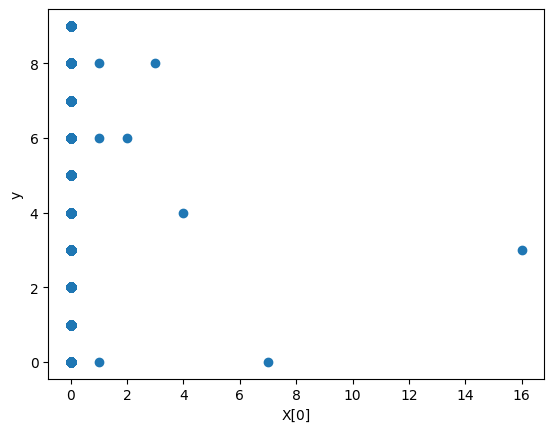

In [3]:
plt.scatter(X_train[:,0],y_train)
plt.xlabel("X[0]")
plt.ylabel("y")
plt.show()

In [4]:
#normalization
def normalization(X):
      mu = np.mean(X,axis=0)
      sigma = np.std(X,axis=0)
      X_norm = (X-mu)/sigma
      return(X_norm,mu,sigma)

In [5]:
#training set for 1 vs all
def one_vs_all(y):
  y_vs = np.zeros([y.shape[0],np.amax(y)+1])
  for i in range(np.amax(y)+1):
    y_vs[:,i] = np.where(y == i,1,0)
  return y_vs

In [22]:
def linear_z(X,w,b):
  z = np.dot(X,w) + b
  fw_b = 1/(1+np.exp(-z))
  return(fw_b)

In [23]:
def compute_cost(y,fw_b):
  m = y.shape[0]
  epsilon = 1e-5
  loss = -y*np.log(fw_b + epsilon) - (1-y)*np.log(1-fw_b + epsilon) 
  cost = np.sum(loss,axis=0)
  cost = cost/m
  return cost

In [24]:
def compute_gradient(X,y,fw_b):
  m = X.shape[0]
  dj_dw = np.matmul(X.T,fw_b-y)
  dj_db = np.sum(fw_b-y,axis=0)
  dj_dw/=m
  dj_db/=m
  return dj_dw,dj_db

In [25]:
def gradient_descent(X,y,w,b,alpha,iterations):
  j_history = []
  for i in range(iterations):
    fw_b = linear_z(X,w,b)
    dj_dw,dj_db = compute_gradient(X,y,fw_b)
    w = w - alpha*dj_dw
    b = b-alpha*dj_db
    if i<100000:
      cost = compute_cost(y,fw_b)
      j_history.append(cost)
    if i % (iterations/10) == 0 or i == iterations-1 :
      print(f"Iterations: {i}    Cost: {cost}      ")
  return w,b,j_history

In [56]:
X_norm,mu,sigma = normalization(X_train)
y_vs = one_vs_all(y_train)
w = np.zeros([X_train.shape[1],np.amax(y_train)+1])
b = np.zeros(np.amax(y_train)+1)
num_iter = 1300
alpha = 0.06
w,b,j_hist = gradient_descent(X_norm,y_vs,w,b,alpha,num_iter)

Iterations: 0    Cost: [0.69312718 0.69312718 0.69312718 0.69312718 0.69312718 0.69312718
 0.69312718 0.69312718 0.69312718 0.69312718]      
Iterations: 130    Cost: [0.20419976 0.11612407 0.23447876 0.19111745 0.22610163 0.20062118
 0.2655887  0.17293217 0.15467333 0.15748199]      
Iterations: 260    Cost: [0.15308522 0.07490039 0.18449067 0.13915189 0.17468602 0.14079649
 0.2194382  0.11868974 0.10557731 0.10277011]      
Iterations: 390    Cost: [0.13458688 0.05893051 0.1665805  0.12009932 0.1561641  0.11720571
 0.20284411 0.09836433 0.08560775 0.0815559 ]      
Iterations: 520    Cost: [0.12505553 0.05020355 0.15738355 0.110184   0.14664946 0.1041646
 0.19432641 0.08765202 0.07452277 0.07039856]      
Iterations: 650    Cost: [0.11919406 0.04460539 0.15174064 0.10403467 0.14081965 0.09568229
 0.1891172  0.08094714 0.06735414 0.06350188]      
Iterations: 780    Cost: [0.11519132 0.04066813 0.14789351 0.0998019  0.13685363 0.08961704
 0.18558015 0.07629876 0.06229578 0.05879322]  

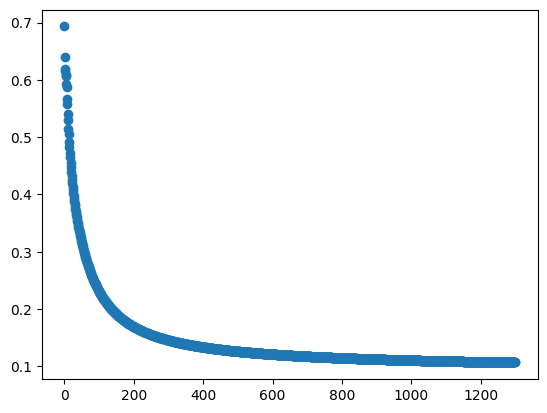

In [57]:
iter = np.arange(num_iter)
j_hist = np.array(j_hist)
plt.scatter(iter,j_hist[:,0])
plt.show()

In [28]:
def predict(X,w,b):
  z = linear_z(X,w,b)
  y = sigmoid(z)
  pred = np.array(y.shape[0])
  pred = np.argmax(y,axis=1)
  return pred

In [29]:
def accuracy(y_data,y_pred):
  c = 0
  for i in range(y_data.shape[0]):
    if y_data[i]==y_pred[i]:
      c+=1 
  acc_percent = c/y_data.shape[0]*100
  return acc_percent

In [58]:
y_pred = predict(X_norm,w,b)
print(accuracy(y_train,y_pred))

85.16333333333334


In [59]:
print(y_pred)

[7 4 1 ... 9 4 0]


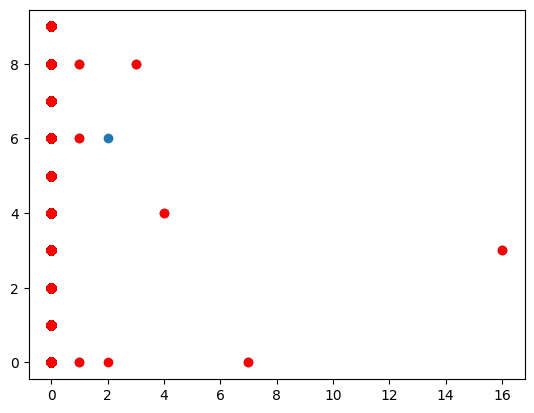

In [60]:
plt.scatter(X_train[:,0],y_train)
plt.scatter(X_train[:,0],y_pred,color='r')
plt.show()

In [61]:
X_normtest = (X_test-mu)/sigma
y_test = predict(X_normtest,w,b)

In [62]:
print(y_test)

[0 1 2 ... 8 6 2]


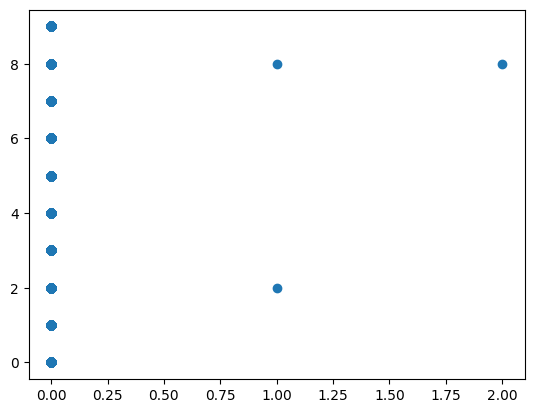

In [63]:
plt.scatter(X_test[:,0],y_test)
plt.show()

In [64]:
df_predicted = pd.DataFrame(data = y_test,index = df_test.ids)
df_predicted.to_csv('Logistic_predicted.csv')